# Nanodegree Engenheiro de Machine Learning
## Aprendizado Supervisionado
## Projeto: Encontrando doadores para a *CharityML*

Seja bem-vindo ao segundo projeto do Nanodegree Engenheiro de Machine Learning! Neste notebook, você receberá alguns códigos de exemplo e será seu trabalho implementar as funcionalidades adicionais necessárias para a conclusão do projeto. As seções cujo cabeçalho começa com **'Implementação'** indicam que o bloco de código posterior requer funcionalidades adicionais que você deve desenvolver. Para cada parte do projeto serão fornecidas instruções e as diretrizes da implementação estarão marcadas no bloco de código com uma expressão `'TODO'`. 
Por favor, leia cuidadosamente as instruções!

Além de implementações de código, você terá de responder questões relacionadas ao projeto e à sua implementação. Cada seção onde você responderá uma questão terá um cabeçalho com o termo **'Questão X'**. Leia com atenção as questões e forneça respostas completas nas caixas de texto que começam com o termo **'Resposta:'**. A submissão do seu projeto será avaliada baseada nas suas resostas para cada uma das questões além das implementações que você disponibilizar.

>**Nota:** Por favor, especifique QUAL A VERSÃO DO PYTHON utilizada por você para a submissão deste notebook. As células "Code" e "Markdown" podem ser executadas utilizando o atalho do teclado **Shift + Enter**. Além disso, as células "Markdown" podem ser editadas clicando-se duas vezes na célula.


## Iniciando

Neste projeto, você utilizará diversos algoritmos de aprendizado supervisionado para modelar com precisão a remuneração de indivíduos utilizando dados coletados no censo americano de 1994. Você escolherá o algoritmo mais adequado através dos resultados preliminares e irá otimizá-lo para modelagem dos dados. O seu objetivo com esta implementação é construir um modelo que pode predizer com precisão se um indivíduo possui uma remuneração superior a $50,000. Este tipo de tarefa pode surgir em organizações sem fins lucrativos que sobrevivem de doações. Entender a remuneração de um indivíduo pode ajudar a organização o montante mais adequado para uma solicitação de doação, ou ainda se eles realmente deveriam entrar em contato com a pessoa. Enquanto pode ser uma tarefa difícil determinar a faixa de renda de uma pesssoa de maneira direta, nós podemos inferir estes valores através de outros recursos disponíveis publicamente. 

O conjunto de dados para este projeto se origina do [Repositório de Machine Learning UCI](https://archive.ics.uci.edu/ml/datasets/Census+Income) e foi cedido por Ron Kohavi e Barry Becker, após a sua publicação no artigo _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. Você pode encontrar o artigo de Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). Os dados que investigaremos aqui possuem algumas pequenas modificações se comparados com os dados originais, como por exemplo a remoção da funcionalidade `'fnlwgt'` e a remoção de registros inconsistentes.


----
## Explorando os dados
Execute a célula de código abaixo para carregar as bibliotecas Python necessárias e carregar os dados do censo. Perceba que a última coluna deste conjunto de dados, `'income'`, será o rótulo do nosso alvo (se um indivíduo possui remuneração igual ou maior do que $50,000 anualmente). Todas as outras colunas são dados de cada indívduo na base de dados do censo.

In [1]:
# Importe as bibliotecas necessárias para o projeto.
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Permite a utilização da função display() para DataFrames.

# Importação da biblioteca de visualização visuals.py
import visuals as vs

import warnings
warnings.filterwarnings('ignore')

# Exibição amigável para notebooks
%matplotlib inline

# Carregando os dados do Censo
data = pd.read_csv("census.csv")

# Sucesso - Exibindo o primeiro registro
display(data.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Implementação: Explorando os Dados

Uma investigação superficial da massa de dados determinará quantos indivíduos se enquadram em cada grupo e nos dirá sobre o percentual destes indivúdos com remuneração anual superior à \$50,000. No código abaixo, você precisará calcular o seguinte:
- O número total de registros, `'n_records'`
- O número de indivíduos com remuneração anual superior à \$50,000, `'n_greater_50k'`.
- O número de indivíduos com remuneração anual até \$50,000, `'n_at_most_50k'`.
- O percentual de indivíduos com remuneração anual superior à \$50,000, `'greater_percent'`.

** DICA: ** Você pode precisar olhar a tabela acima para entender como os registros da coluna `'income'` estão formatados.

In [2]:
# olhando como as rendas são apresentadas na tabela

data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [3]:
# TODO: Número total de registros.
n_records = len(data)

# TODO: Número de registros com remuneração anual superior à $50,000
n_greater_50k = len(data[data.income == '>50K'])

# TODO: O número de registros com remuneração anual até $50,000
n_at_most_50k = len(data[data.income == '<=50K'])

# TODO: O percentual de indivíduos com remuneração anual superior à $50,000
greater_percent = (n_greater_50k/data.shape[0])*100

# Exibindo os resultados
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Explorando as colunas **
* **age**: contínuo. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: contínuo. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: contínuo. 
* **capital-loss**: contínuo. 
* **hours-per-week**: contínuo. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparando os dados
Antes de que os dados possam ser utilizados como input para algoritmos de machine learning, muitas vezes eles precisam ser tratados, formatados e reestruturados — este processo é conhecido como **pré-processamento**. Felizmente neste conjunto de dados não existem registros inconsistentes para tratamento, porém algumas colunas precisam ser ajustadas. Este pré-processamento pode ajudar muito com o resultado e poder de predição de quase todos os algoritmos de aprendizado.

### Transformando os principais desvios das colunas contínuas
Um conjunto de dados pode conter ao menos uma coluna onde os valores tendem a se próximar para um único número, mas também podem conter registros com o mesmo atributo contendo um valor muito maior ou muito menor do que esta tendência. Algoritmos podem ser sensíveis para estes casos de distribuição de valores e este fator pode prejudicar sua performance se a distribuição não estiver normalizada de maneira adequada. Com o conjunto de dados do censo, dois atributos se encaixam nesta descrição: '`capital-gain'` e `'capital-loss'`.

Execute o código da célula abaixo para plotar um histograma destes dois atributos. Repare na distribuição destes valores.

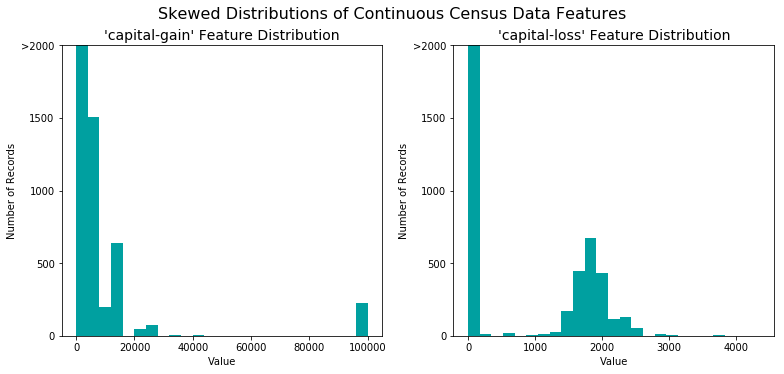

In [4]:
# Dividindo os dados entre features e coluna alvo
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualizando os principais desvios das colunas contínuas entre os dados
vs.distribution(data)

Para atributos com distribuição muito distorcida, tais como `'capital-gain'` e `'capital-loss'`, é uma prática comum aplicar uma <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">transformação logarítmica</a> nos dados para que os valores muito grandes e muito pequenos não afetem a performance do algoritmo de aprendizado. Usar a transformação logarítmica reduz significativamente os limites dos valores afetados pelos outliers (valores muito grandes ou muito pequenos). Deve-se tomar cuidado ao aplicar esta transformação, poir o logaritmo de `0` é indefinido, portanto temos que incrementar os valores em uma pequena quantia acima de `0` para aplicar o logaritmo adequadamente.

Execute o código da célula abaixo para realizar a transformação nos dados e visualizar os resultados. De novo, note os valores limite e como os valores estão distribuídos.

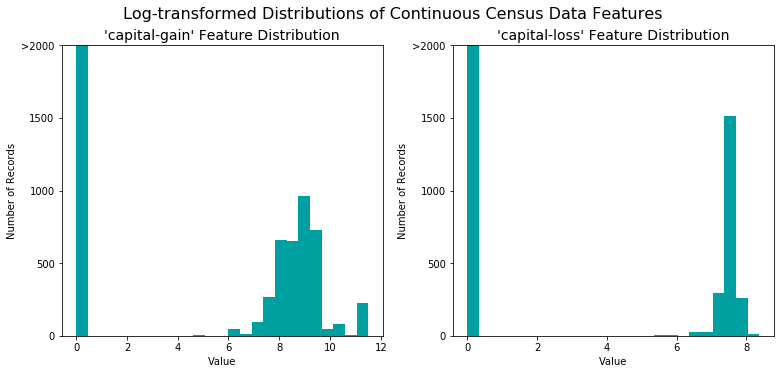

In [5]:
# Aplicando a transformação de log nos registros distorcidos.
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualizando as novas distribuições após a transformação.
vs.distribution(features_log_transformed, transformed = True)

### Normalizando atributos numéricos
Além das transformações em atributos distorcidos, é uma boa prática comum realizar algum tipo de adaptação de escala nos atributos numéricos. Ajustar a escala nos dados não modifica o formato da distribuição de cada coluna (tais como `'capital-gain'` ou `'capital-loss'` acima); no entanto, a normalização garante que cada atributo será tratado com o mesmo peso durante a aplicação de aprendizado supervisionado. Note que uma vez aplicada a escala, a observação dos dados não terá o significado original, como exemplificado abaixo.

Execute o código da célula abaixo para normalizar cada atributo numérico, nós usaremos ara isso a [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [6]:
# Importando sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Inicializando um aplicador de escala e aplicando em seguida aos atributos
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Exibindo um exemplo de registro com a escala aplicada
display(features_log_minmax_transform.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementação: Pré-processamento dos dados

A partir da tabela em **Explorando os dados** acima, nós podemos observar que existem diversos atributos não-numéricos para cada registro. Usualmente, algoritmos de aprendizado esperam que os inputs sejam numéricos, o que requer que os atributos não numéricos (chamados de *variáveis de categoria*) sejam convertidos. Uma maneira popular de converter as variáveis de categoria é utilizar a estratégia **one-hot encoding**. Esta estratégia cria uma variável para cada categoria possível de cada atributo não numérico. Por exemplo, assuma que `algumAtributo` possuí três valores possíveis: `A`, `B`, ou `C`. Nós então transformamos este atributo em três novos atributos: `algumAtributo_A`, `algumAtributo_B` e `algumAtributo_C`.


|   | algumAtributo |                    | algumAtributo_A | algumAtributo_B | algumAtributo_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Além disso, assim como os atributos não-numéricos, precisaremos converter a coluna alvo não-numérica, `'income'`, para valores numéricos para que o algoritmo de aprendizado funcione. Uma vez que só existem duas categorias possíveis para esta coluna ("<=50K" e ">50K"), nós podemos evitar a utilização do one-hot encoding e simplesmente transformar estas duas categorias para `0` e `1`, respectivamente. No trecho de código abaixo, você precisará implementar o seguinte:
 - Utilizar [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para realizar o one-hot encoding nos dados da `'features_log_minmax_transform'`.
 - Converter a coluna alvo `'income_raw'` para re.
   - Transforme os registros com "<=50K" para `0` e os registros com ">50K" para `1`.

In [7]:
# TODO: Utilize o one-hot encoding nos dados em 'features_log_minmax_transform' utilizando pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)
#print(features_final.head())

# TODO: Faça o encode da coluna 'income_raw' para valores numéricos
income = income_raw.replace('<=50K', 0).replace('>50K', 1)
#print(income.head())

# Exiba o número de colunas depois do one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Descomente a linha abaixo para ver as colunas após o encode
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Embaralhar e dividir os dados
Agora todas as _variáveis de categoria_ foram convertidas em atributos numéricos e todos os atributos numéricos foram normalizados. Como sempre, nós agora dividiremos os dados entre conjuntos de treinamento e de teste. 80% dos dados serão utilizados para treinamento e 20% para teste.

Execute o código da célula abaixo para realizar divisão.

In [8]:
# Importar train_test_split
from sklearn.model_selection import train_test_split

# Dividir os 'atributos' e 'income' entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Avaliando a performance do modelo
Nesta seção nós investigaremos quatro algoritmos diferentes e determinaremos qual deles é melhor para a modelagem dos dados. Três destes algoritmos serão algoritmos de aprendizado supervisionado de sua escolha e o quarto algoritmo é conhecido como *naive predictor*.

### Métricas e o Naive predictor

*CharityML*, equpada com sua pesquisa, sabe que os indivíduos que fazem mais do que \$50,000 possuem maior probabilidade de doar para a sua campanha de caridade. Por conta disto, a *CharityML* está particularmente interessada em predizer com acurácia quais indivíduos possuem remuneração acima de \$50,000. Parece que utilizar **acurácia (accuracy)** como uma métrica para avaliar a performance de um modelo é um parâmetro adequado. Além disso, identificar alguém que *não possui* remuneração acima de \$50,000 como alguém que recebe acima deste valor seria ruim para a *CharityML*, uma vez que eles estão procurando por indivíduos que desejam doar. Com isso, a habilidade do modelo em predizer com preisão aqueles que possuem a remuneração acima dos \$50,000 é *mais importante* do que a habilidade de realizar o **recall** destes indivíduos. Nós podemos utilizar a fórmula **F-beta score** como uma métrica que considera ambos: precision e recall.


$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

Em particular, quando $\beta = 0.5$, maior ênfase é atribuída para a variável precision. Isso é chamado de **F$_{0.5}$ score** (ou F-score, simplificando).

Analisando a distribuição de classes (aqueles que possuem remuneração até \$50,000 e aqueles que possuem remuneração superior), fica claro que a maioria dos indivíduos não possui remuneração acima de \$50,000. Isto pode ter grande impacto na **acurácia (accuracy)**, uma vez que nós poderíamos simplesmente dizer *"Esta pessoa não possui remuneração acima de \$50,000"* e estar certos em boa parte das vezes, sem ao menos olhar os dados! Fazer este tipo de afirmação seria chamado de **naive**, uma vez que não consideramos nenhuma informação para balisar este argumento. É sempre importante considerar a *naive prediction* para seu conjunto de dados, para ajudar a estabelecer um benchmark para análise da performance dos modelos. Com isso, sabemos que utilizar a naive prediction não traria resultado algum: Se a predição apontasse que todas as pessoas possuem remuneração inferior à \$50,000, a *CharityML* não identificaria ninguém como potencial doador. 



#### Nota: Revisando: accuracy, precision e recall

** Accuracy ** mede com que frequência o classificador faz a predição correta. É a proporção entre o número de predições corretas e o número total de predições (o número de registros testados).

** Precision ** informa qual a proporção de mensagens classificamos como spam eram realmente spam. Ou seja, é a proporção de verdadeiros positivos (mensagens classificadas como spam que eram realmente spam) sobre todos os positivos (todas as palavras classificadas como spam, independente se a classificação estava correta), em outras palavras, é a proporção

`[Verdadeiros positivos/(Verdadeiros positivos + Falso positivos)]`

** Recall(sensibilidade)** nos informa qual a proporção das mensagens que eram spam que foram corretamente classificadas como spam. É a proporção entre os verdadeiros positivos (classificados como spam, que realmente eram spam) sobre todas as palavras que realmente eram spam. Em outras palavras, é a proporção entre

`[Verdadeiros positivos/(Verdadeiros positivos + Falso negativos)]`

Para problemas de classificação distorcidos em suas distribuições, como no nosso caso, por exemplo, se tivéssemos 100 mensagems de texto e apenas 2 fossem spam e todas as outras não fossem, a "accuracy" por si só não seria uma métrica tão boa. Nós poderiamos classificar 90 mensagems como "não-spam" (incluindo as 2 que eram spam mas que teriam sido classificadas como não-spam e, por tanto, seriam falso negativas.) e 10 mensagems como spam (todas as 10 falso positivas) e ainda assim teriamos uma boa pontuação de accuracy. Para estess casos, precision e recall são muito úteis. Estas duas métricas podem ser combinadas para resgatar o F1 score, que é calculado através da média(harmônica) dos valores de precision e de recall. Este score pode variar entre 0 e 1, sendo 1 o melhor resultado possível para o F1 score (consideramos a média harmônica pois estamos lidando com proporções).

### Questão 1 - Performance do Naive Predictor
* Se escolhessemos um modelo que sempre prediz que um indivíduo possui remuneração acima de $50,000, qual seria a accuracy e o F-score considerando este conjunto de dados? Você deverá utilizar o código da célula abaixo e atribuir os seus resultados para as variáveis `'accuracy'` e `'fscore'` que serão usadas posteriormente.

** Por favor, note ** que o propósito ao gerar um naive predictor é simplesmente exibir como um modelo sem nenhuma inteligência se comportaria. No mundo real, idealmente o seu modelo de base será o resultado de um modelo anterior ou poderia ser baseado em um paper no qual você se basearia para melhorar. Quando não houver qualquer benchmark de modelo, utilizar um naive predictor será melhor do que uma escolha aleatória.

** DICA: ** 

* Quando temos um modelo que sempre prediz '1' (e.x o indivíduo possui remuneração superior à 50k) então nosso modelo não terá Verdadeiros Negativos ou Falso Negativos, pois nós não estaremos afirmando que qualquer dos valores é negativo (ou '0') durante a predição. Com isso, nossa accuracy neste caso se torna o mesmo valor da precision (Verdadeiros positivos/ (Verdadeiros positivos + Falso positivos)) pois cada predição que fizemos com o valor '1' que deveria ter o valor '0' se torna um falso positivo; nosso denominador neste caso é o número total de registros.
* Nossa pontuação de Recall(Verdadeiros positivos/(Verdadeiros Positivos + Falsos negativos)) será 1 pois não teremos Falsos negativos.

In [9]:
'''
TP = np.sum(income) # Contando pois este é o caso "naive". Note que 'income' são os dados 'income_raw' convertidos
para valores numéricos durante o passo de pré-processamento de dados.
FP = income.count() - TP # Específico para o caso naive

TN = 0 # Sem predições negativas para o caso naive
FN = 0 # Sem predições negativas para o caso naive
'''
# TODO: Calcular accuracy, precision e recall
accuracy = np.sum(income)/data.shape[0]
recall = np.sum(income)/np.sum(income)
precision = np.sum(income)/data.shape[0]

# TODO: Calcular o F-score utilizando a fórmula acima para o beta = 0.5 e os valores corretos de precision e recall.
fscore = 1.25 * (precision*recall) / ((0.25*precision)+recall)

# Exibir os resultados 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Modelos de Aprendizado Supervisionado
**Estes são alguns dos modelos de aprendizado supervisionado disponíveis em** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees (Árvores de decisão)
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Questão 2 - Aplicação do Modelo
Liste três dos modelos de aprendizado supervisionado acima que são apropriados para este problema que você irá testar nos dados do censo. Para cada modelo escolhido

- Descreva uma situação do mundo real onde este modelo pode ser utilizado. 
- Quais são as vantagems da utilização deste modelo; quando ele performa bem?
- Quais são as fraquesas do modelo; quando ele performa mal?
- O que torna este modelo um bom candidato para o problema, considerando o que você sabe sobre o conjunto de dados?

** DICA: **

Estruture sua resposta no mesmo formato acima^, com 4 partes para cada um dos modelos que você escolher. Por favor, inclua referências em cada uma das respostas.

**Resposta: **

**1) Logistic Regression**


- Podemos usar esse tipo de modelo para fazer a classificação binária dos dados e saber a probabilidade de um determinado conjunto de atributos pertencer ou não a uma determinada classe. Por exemplo, podemos usar esse modelo para classificar os clientes de um banco como aptos ou não-aptos para receber um empréstimo (https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Financial-Services/gx-be-aers-fsi-credit-scoring.pdf).


- Esse tipo de modelo é utilizado por bancos por causa da fácil explicação matemática de como ele faz a separação dos clientes. Com isso, os analistas podem entender quais variáveis o modelo usa e evitar tendências preconceituosas. 


- Dependendo de como os dados estão distribuídos, o modelo pode não conseguir separar bem os clientes em dois grupos distintos.


- Como neste projeto queremos separar as pessoas em dois grupos, um grupo que provavelmente não doaria dinheiro (renda menor do que 50k por ano) e outro que provavelmente doaria (renda maior do que 50k por ano), esse modelo é o mais simples matematicamente e muito utilizado para classificações binárias. Além disso, é interessante começar com esse modelo para saber como o conjunto de dados analisado se comporta antes de tentar modelos mais complexos matematicamente como SVM e técnicas de ensemble.


**2) Support Vector Machines (SVM)**


- Modelos de máquina de suporte vetorial podem ser utilizados para classificação de doenças (https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/1472-6947-10-16). Além disso, podem ser utilizados com trabalhos relacionados com reconhecimento de imagens e para remoção de ruído. Antes do de deep-learning existir esse tipo de modelo era o mais eficaz para reconhecimento de imagens.


- A principal vantagem desse modelo é sua sólida base matemática utilizada para realizar as transformações dimensionais. Com as mudanças de dimensões, os conjuntos de dados que não poderiam ser separando em um espaço dimensional $R$ são transformados outro espaço dimensional $R^{n}$ , n > 1, onde podem ser facilmente separados.


- A principal fraqueza desse modelo é que não conseguimos visualizar como os dados são representados após a mudança do espaço dimensional. Precisamos realizar diversas transformações dimensionais e com isso perdemos a visualização original dos dados e a sua interpretação original. 


- Esse modelo é interessante para saber como a separação das classes ocorreriam em um espaço dimensional diferente. Com isso, podemos confrontar o modelo de regressão com esse modelo e visualizar se teríamos ou não uma grande melhora no desempenho do modelo e na forma de identificar possíveis doadores para CharityML.

**3) Ensemble Methods (Random Forest)**


- Métodos de ensemble são muito utilizados para ganhar competições em site como Kaggle. 


- Esse tipo de modelo é poderoso pois monta diversas árvores e a predição final é uma média das previsões de diversas árvores ajudando o modelo a ter um desempenho melhor do que um modelo simples de árvore de decisão. Além disso, por causa das diversas árvores criadas, temos um perigo menor de overfitting/underfitting.


- A principal fraqueza desse modelo é a quantidade necessária de dados. Como o modelo precisa montar diversas árvores de decisão, quanto mais dados disponíveis, mais árvores podemos montar sem o perigo de overfitting/underfitting. 


- Esse modelo é interessante para classificar os dados do projeto pois podemos montar diversas árvores de decisão e com isso no final saber quais atribuitos são mais significativos na hora de classificar os dados como possíveis doadores ou não.

### Implementação - Criando um Pipeline de Treinamento e Predição
Para avaliar adequadamente a performance de cada um dos modelos que você escolheu é importante que você crie um pipeline de treinamento e predição que te permite de maneira rápida e eficiente treinar os modelos utilizando vários tamanhos de conjuntos de dados para treinamento, além de performar predições nos dados de teste. Sua implementação aqui será utilizada na próxima seção. No bloco de código abaixo, você precisará implementar o seguinte:
 - Importar `fbeta_score` e `accuracy_score` de [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Adapte o algoritmo para os dados de treinamento e registre o tempo de treinamento. 
 - Realize predições nos dados de teste `X_test`, e também nos 300 primeiros pontos de treinamento `X_train[:300]`.
   - Registre o tempo total de predição. 
 - Calcule a acurácia tanto para o conjundo de dados de treino quanto para o conjunto de testes.
 - Calcule o F-score para os dois conjuntos de dados: treino e testes. 
   - Garanta que você configurou o parâmetro `beta`! 

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train[:300], beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementação: Validação inicial do modelo
No código da célula, você precisará implementar o seguinte:
- Importar os três modelos de aprendizado supervisionado que você escolheu na seção anterior 
- Inicializar os três modelos e armazená-los em `'clf_A'`, `'clf_B'`, e `'clf_C'`. 
  - Utilize um `'random_state'` para cada modelo que você utilizar, caso seja fornecido.
  - **Nota:** Utilize as configurações padrão para cada modelo - você otimizará um modelo específico em uma seção posterior
- Calcule o número de registros equivalentes à 1%, 10%, e 100% dos dados de treinamento.
  - Armazene estes valores em `'samples_1'`, `'samples_10'`, e `'samples_100'` respectivamente.

**Nota:** Dependendo do algoritmo de sua escolha, a implementação abaixo pode demorar algum tempo para executar!

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


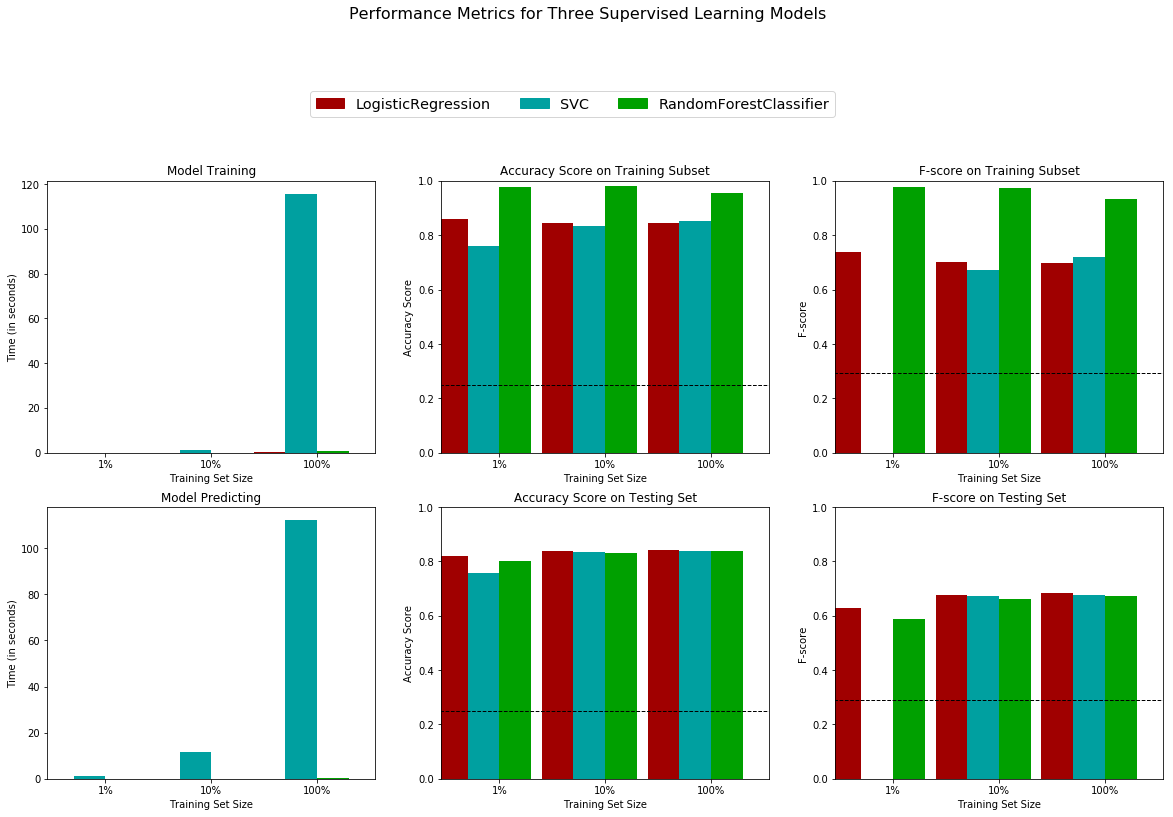

In [11]:
# TODO: Importe os três modelos de aprendizado supervisionado da sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# TODO: Inicialize os três modelos

clf_A = LogisticRegression(random_state=0)
clf_B = SVC(random_state=0)
clf_C = RandomForestClassifier(random_state=0)

# TODO: Calcule o número de amostras para 1%, 10%, e 100% dos dados de treinamento
# HINT: samples_100 é todo o conjunto de treinamento e.x.: len(y_train)
# HINT: samples_10 é 10% de samples_100
# HINT: samples_1 é 1% de samples_100
samples_100 = len(y_train)
samples_10 = int(0.1*samples_100)
samples_1 = int(0.01*samples_100)


# Colete os resultados dos algoritmos de aprendizado
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

#### ----
## Melhorando os resultados
Nesta seção final, você irá escolher o melhor entre os três modelos de aprendizado supervisionado para utilizar nos dados dos estudantes. Você irá então realizar uma busca grid para otimização em todo o conjunto de dados de treino (`X_train` e `y_train`) fazendo o tuning de pelo menos um parâmetro para melhorar o F-score anterior do modelo.

### Questão 3 - Escolhendo o melhor modelo

* Baseado na validação anterior, em um ou dois parágrafos explique para a *CharityML* qual dos três modelos você acredita ser o mais apropriado para a tarefa de identificar indivíduos com remuneração anual superior à \$50,000.  

** DICA: ** 
Analise o gráfico do canto inferior esquerdo da célula acima(a visualização criada através do comando `vs.evaluate(results, accuracy, fscore)`) e verifique o F score para o conjunto de testes quando 100% do conjunto de treino é utilizado. Qual modelo possui o maior score? Sua resposta deve abranger os seguintes pontos:
* métricas - F score no conjunto de testes quando 100% dos dados de treino são utilizados, 
* tempo de predição/treinamento 
* a adequação do algoritmo para este conjunto de dados.

**Resposta: **

Acredito que o modelo de regressão logística é o melhor modelo para usarmos neste projeto. O modelo escolhido além de ter uma boa definição matemática, o que nos ajuda na interpretação final de quais variáveis são mais importantes para o mesmo, possui o melhor F-score no conjunto de dados de teste entre todos os modelos estudados em todas as divisões dos dados.
O F-score do modelo de regressão logística foi, em todas as configurações testadas, um pouco maior do que o F-score dos outros modelos, indicando que temos uma precisão maior na predição de pessoas com renda acima de 50 mil anuais. Em outras palavras, estamos indentificando um número pequeno de falsos positivos que são pessoas que possuem renda menor do que 50 mil e são preditas como tendo renda maior do que 50 mil.


### Questão 4 - Descrevendo o modelo nos termos de Layman
 
* Em um ou dois parágrafos, explique para a *CharityML*, usando termos leigos, como o modelo final escolhido deveria funcionar. Garanta que você está descrevendo as principais vantagens do modelo, tais como o modo de treinar o modelo e como o modelo realiza a predição. Evite a utilização de jargões matemáticos avançados, como por exemplo a descrição de equações. 

** DICA: **

Quando estiver explicando seu modelo, cite as fontes externas utilizadas, caso utilize alguma.

**Resposta: ** 

Escolhi o modelo de regressão logística, modelo no qual informamos os atributos/informações das pessoas que queremos prever a renda anual e através de técnicas estatísticas o modelo consegue nos dizer se a pessoa possui ou não renda anual acima de 50 mil dólares.

O modelo de regressão logística recebe como entrada, no nosso caso, os atributos de cada pessoa e consegue nos fornecer a probabilidade da pessoa ter ou não uma renda anual acima de 50 mil dólares. Esse modelo é muito parecido com o modelo de regressão linear mas ao invés de prever um valor numérico a predição do modelo de regressão logística é a probabilidade dos atributos pertencerem a uma determinada classe.

A regressão logística é capaz de fornecer, de forma contínua, a probabilidade dos atributos pertencerem a uma determinada classe ou, como usamos nesse projeto, fornecer uma classificação binária para os dados estudados. No nosso caso, quando a probabilidade for igual ou maior a 50% dos atributos analisados pertecerem a uma pessoa que possui uma renda anual acima de 50 mil dólares recebemos o 'sim' (output 1) como predição do modelo. No caso contrário, quando temos uma probabilidade menor do que 50%, recebemos o não (output 0) como predição para os atributos analisados.

Escolhi esse modelo pois ele apresentou os melhores resultados na hora da avaliação final, com um conjunto de dados que o modelo ainda não conhecia. Isso indica que o modelo não está viciado em alguns tipos de dados. Além disso, o tempo de treinamento e predição do modelo foi basicamente negligível indicando que o mesmo não será caro computacionalmente.

Além disso, esse modelo é interesse pois com ele podemos explicar a importância de cada atributo para a predição de renda e saber se estamos sendo tendenciosos ou não na predição de pessoas que teriam renda anual acima de 50 mil.


### Implementação: Tuning do modelo
Refine o modelo escolhido. Utilize uma busca grid (`GridSearchCV`) com pelo menos um parâmetro importante refinado com pelo menos 3 valores diferentes. Você precisará utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você precisará implementar o seguinte:
- Importar [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Inicializar o classificador escolhido por você e armazená-lo em `clf`.
 - Configurar um `random_state` se houver um disponível para o mesmo estado que você configurou anteriormente.
- Criar um dicionário dos parâmetros que você quer otimizar para o modelo escolhido.
 - Exemplo: `parâmetro = {'parâmetro' : [lista de valores]}`.
 - **Nota:** Evite otimizar o parâmetro `max_features` se este parâmetro estiver disponível! 
- Utilize `make_scorer` para criar um objeto de pontuação `fbeta_score` (com $\beta = 0.5$).
- Realize a busca gride no classificador `clf` utilizando o `'scorer'` e armazene-o na variável `grid_obj`.   
- Adeque o objeto da busca grid aos dados de treino (`X_train`, `y_train`) e armazene em `grid_fit`.

**Nota:** Dependendo do algoritmo escolhido e da lista de parâmetros, a implementação a seguir pode levar algum tempo para executar! 

In [12]:
# TODO: Importar 'GridSearchCV', 'make_scorer', e qualquer biblioteca necessária
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Inicializar o classificador
clf = LogisticRegression(random_state=0)

# TODO: Criar a lista de parâmetros que você quer otimizar, utilizando um dicionário, caso necessário.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'penalty':['l1', 'l2'], 'C':[0.2,0.4,0.6,0.8,1.0], 'class_weight':[None, 'balanced'], 'fit_intercept':['True', 'False']}

# TODO: Criar um objeto fbeta_score utilizando make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Realizar uma busca grid no classificador utilizando o 'scorer' como o método de score no GridSearchCV() 
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Adequar o objeto da busca grid como os dados para treinamento e encontrar os parâmetros ótimos utilizando fit() 
grid_fit = grid_obj.fit(X_train, y_train)

# Recuperar o estimador
best_clf = grid_fit.best_estimator_

# Realizar predições utilizando o modelo não otimizado e modelar
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Reportar os scores de antes e de depois
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8419
F-score on testing data: 0.6832

Optimized Model
------
Final accuracy score on the testing data: 0.8423
Final F-score on the testing data: 0.6844


### Questão 5 - Validação final do modelo

* Qual é a accuracy e o F-score do modelo otimizado utilizando os dados de testes?
* Estes scores são melhores ou piores do que o modelo antes da otimização? 
* Como os resultados do modelo otimizado se comparam aos benchmarks do naive predictor que você encontrou na **Questão 1**?_

**Nota:** Preencha a tabela abaixo com seus resultados e então responda as questões no campo **Resposta** 

#### Resultados:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |        0.8419     |   0.8423        |
| F-score        |        0.6832     |   0.6844        |


**Resposta: **

A acurácia do modelo otimizado com os dados de teste é 84.14%, enquanto o F-score do mesmo modelo otimizado é 68.32%.

Os valores da acurácia e do F-score do modelo otimizado são ligeiramente maiores do que os valores do modelo não otimizado: 0.05% maior para acurácio e 0,18% maior para o F-score. 

Quando comparamos os valores do modelo otimizado com os benchmarks do naive predictor temos um aumento de >150% para as métricas mencionadas: ~189% de aumento na acurácia e ~176% de aumento no F-score. Esse aumento percentual não é insignificante e mostra que o modelo performa muito melhor que o naive predictor usado no início para conhecer os dados. 

----
## Importância dos atributos

Uma tarefa importante quando realizamos aprendizado supervisionado em um conjunto de dados como os dados do censo que estudamos aqui é determinar quais atributos fornecem maior poder de predição. Focando no relacionamento entre alguns poucos atributos mais importantes e na label alvo nós simplificamos muito o nosso entendimento do fenômeno, que é a coisa mais importante a se fazer. No caso deste projeto, isso significa que nós queremos identificar um pequeno número de atributos que possuem maior chance de predizer se um indivíduo possui renda anual superior à \$50,000.

Escolha um classificador da scikit-learn (e.x.: adaboost, random forests) que possua o atributo `feature_importance_`, que é uma função que calcula o ranking de importância dos atributos de acordo com o classificador escolhido. Na próxima célula python ajuste este classificador para o conjunto de treinamento e utilize este atributo para determinar os 5 atributos mais importantes do conjunto de dados do censo.

### Questão 6 - Observação da Relevância dos Atributos
Quando **Exploramos os dados**, vimos que existem treze atributos disponíveis para cada registro nos dados do censo. Destes treze atributos, quais os 5 atributos que você acredita que são os mais importantes para predição e em que ordem você os ranquearia? Por quê?

**Resposta:**

Acredito que os 5 atributos mais importantes seriam:

1) Education-level: pois os salários geralmente são correlacionados com os anos de estudo.

2) workclass: nessa variável temos a classe trabalhadora que pode ajudar na previsão da renda mensal.

3) occupation: esse atributo com a variável 'workclass' pode ajudar a melhorar a previsão da renda anual.

4) hour-per-week: dependendo da classe de trabalho e profissão, quanto mais uma pessoa trabalha maior será o seu trabalho.

5) native-country: junto com as informações acima pode indicar a renda anual da pessoa. Se a pessoa veio de um outro país, com muitos anos de estudo e com uma ocupação/classe de trabalho em falta no país analisado, essa pessoa provavelmente terá uma alta renda anual.

### Implementação - Extraindo a importância do atributo
Escolha um algoritmo de aprendizado supervisionado da `sciki-learn` que possui o atributo `feature_importance_` disponível. Este atributo é uma função que ranqueia a importância de cada atributo dos registros do conjunto de dados quando realizamos predições baseadas no algoritmo escolhido.

Na célula de código abaixo, você precisará implementar o seguinte:
 - Importar um modelo de aprendizado supervisionado da sklearn se este for diferente dos três usados anteriormente. 
 - Treinar o modelo supervisionado com todo o conjunto de treinamento.
 - Extrair a importância dos atributos utilizando `'.feature_importances_'`.

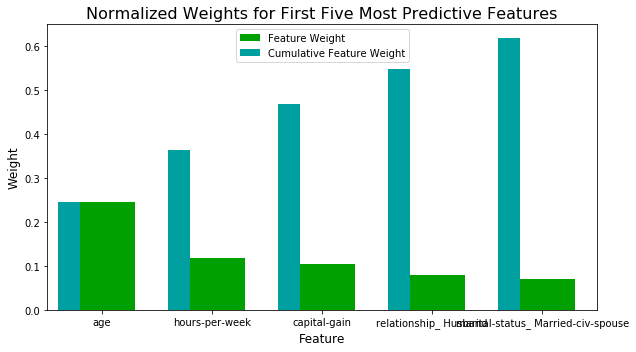

In [13]:
# TODO: Importar um modelo de aprendizado supervisionado que tenha 'feature_importances_'
# importado acima: from sklearn.ensemble import RandomForestClassifier

# TODO: Treinar o modelo utilizando o conjunto de treinamento com .fit(X_train, y_train)
model = clf_C.fit(X_train, y_train)

# TODO: Extrair a importância dos atributos utilizando .feature_importances_ 
importances = model.feature_importances_

# Plotar
vs.feature_plot(importances, X_train, y_train)

### Questão 7 - Extraindo importância dos atributos

Observe a visualização criada acima que exibe os cinco atributos mais relevantes para predizer se um indivíduo possui remuneração igual ou superior à \$50,000 por ano.

* Como estes cinco atributos se comparam com os 5 atributos que você discutiu na **Questão 6**? 
* Se você estivesse próximo da mesma resposta, como esta visualização confirma o seu raciocínio? 
* Se você não estava próximo, por que você acha que estes atributos são mais relevantes? 

**Resposta:**

Apenas a segunda variável, hours-per-week, estava na minha lista montada anteriormente. 

Escolhi a variável education-level mas agora percebo que a variável education-num foi mais importante para o modele pois é uma medida mais precisa do que uma variável categórica.

Age, relationship-Husband e marital-status_Married-civ-spouse foram uma supresa, pois apesar de que uma pessoa mais velha provavelmente ganha mais isso nem sempre é verdade e além disso, com o casamento, a pessoa provavelmente possui mais despesas. O atributo capital-gain também foi uma supresa e eu não esperava que fosse importante para prever a renda, pois interpretei como uma variável que não representaria necessariamente a renda e sim uma renda esporádica na vida da pessoa em questão. 

### Selecionando atributos

Como um modelo performa se nós só utilizamos um subconjunto de todos os atributos disponíveis nos dados? Com menos atributos necessários para treinar, a expectativa é que o treinamento e a predição sejam executados em um tempo muito menor — com o custo da redução nas métricas de performance. A partir da visualização acima, nós vemos que os cinco atributos mais importantes contribuem para mais de 50% da importância de **todos** os atributos presentes nos dados. Isto indica que nós podemos tentar *reduzir os atributos* e simplificar a informação necessária para o modelo aprender. O código abaixo utilizará o mesmo modelo otimizado que você encontrou anteriormente e treinará o modelo com o mesmo conjunto de dados de treinamento, porém apenas com *os cinco atributos mais importantes*

In [14]:
# Importar a funcionalidade para clonar um modelo
from sklearn.base import clone

# Reduzir a quantidade de atributos
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Treinar o melhor modelo encontrado com a busca grid anterior
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Fazer novas predições
reduced_predictions = clf.predict(X_test_reduced)

# Reportar os scores do modelo final utilizando as duas versões dos dados.
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8423
F-score on testing data: 0.6844

Final Model trained on reduced data
------
Accuracy on testing data: 0.7846
F-score on testing data: 0.5142


### Questão 8 - Efeitos da seleção de atributos

* Como o F-score do modelo final e o accuracy score do conjunto de dados reduzido utilizando apenas cinco atributos se compara aos mesmos indicadores utilizando todos os atributos? 
* Se o tempo de treinamento é uma variável importante, você consideraria utilizar os dados enxutos como seu conjunto de treinamento? 


**Resposta:**

Com a redução dos atributos utilizados para a predição, a acurácia diminuiu ~7% enquanto o F-score diminuiu ~25%.

Em modelos que possuem um custo computacional muito alto é importante fazer a seleção dos atributos. Mas como o modelo que escolhi não possui um alto custo computacional eu continuaria com os atributos que foram retirados para continuar com os melhores valores para a acurácio e para o F-score e assim ter um resultado prático melhor.



> **Nota**: Uma vez que você tenha concluído toda a implementação de código e respondido cada uma das questões acima, você poderá finalizar o seu trabalho exportando o iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima navegando para 
**File -> Download as -> HTML (.html)**. Inclua este documento junto do seu notebook como sua submissão.